* https://towardsdatascience.com/4x-faster-scikit-learn-in-3-lines-of-code-6b8799876b4a
* https://www.comet.ml/team-comet-ml/dataset-profile/reports/profiling-and-visualizing-datasets-with-comet
* https://towardsdatascience.com/automatically-track-all-your-eda-using-sweetviz-and-comet-ml-9cb7545b0fab
* https://newbedev.com/converting-statsmodels-summary-object-to-pandas-dataframe

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
blackhole_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/581beddf-4b3a-4695-ba1e-5b12d5213d4f').sort_index(axis=0)

In [4]:
blackhole_data.tail(5)

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  \
5582539             3.17736            0.986222         0.001021   
5582540             1.53873            1.036010         0.002222   
5582541             5.42521            5.394430         0.003953   
5582542             3.41019            1.603280         0.001192   
5582543             5.42059            5.420590         0.010988   

         Cold_Gas_Mass  Hot_Gas_Mass  Ejected_Gas_Mass  \
5582539       0.606594       1.66838          0.710737   
5582540       0.075676       3.00467          0.000000   
5582541       0.369094     257.56900          0.000000   
5582542       0.000000       0.00000          0.000000   
5582543       0.525618     495.86300          0.000000   

         Intracluster_Stars_Mass  Metals_Total_Stellar_Mass  \
5582539                 0.080638                   0.054489   
5582540                 0.000000                   0.016969   
5582541                37.377600                   0.067727   
5582542                 0.000000                   0.059073   
5582543                 0.000000                   0.048182   

         Metals_Bulge_Mass  Metals_Cold_Gas_Mass  ...  SDSS_u_Absolute  \
5582539           0.013347              0.014215  ...         -20.3747   
5582540           0.011119              0.000793  ...         -17.7013   
5582541           0.066981              0.008799  ...         -15.6512   
5582542           0.025519              0.000000  ...         -18.4381   
5582543           0.048182              0.004018  ...         -17.4553   

         SDSS_u_Apparent  SDSS_g_Absolute  SDSS_g_Apparent  SDSS_r_Absolute  \
5582539         -20.3747         -21.3888         -21.3888         -21.8067   
5582540         -17.7013         -19.4063         -19.4063         -20.1372   
5582541         -15.6512         -17.3195         -17.3195         -18.0331   
5582542         -18.4381         -20.2295         -20.2295         -20.9901   
5582543         -17.4553         -19.0399         -19.0399         -19.7194   

         SDSS_r_Apparent  SDSS_i_Absolute  SDSS_i_Apparent  SDSS_z_Absolute  \
5582539         -21.8067         -22.0616         -22.0616         -22.3024   
5582540         -20.1372         -20.4934         -20.4934         -20.7672   
5582541         -18.0331         -18.3737         -18.3737         -18.6386   
5582542         -20.9901         -21.3661         -21.3661         -21.6778   
5582543         -19.7194         -20.0388         -20.0388         -20.2639   

         SDSS_z_Apparent  
5582539         -22.3024  
5582540         -20.7672  
5582541         -18.6386  
5582542         -21.6778  
5582543         -20.2639  

[5 rows x 32 columns]

In [5]:
blackhole_data.isnull().sum()

Total_Stellar_Mass                 0
Bulge_Stellar_Mass                 0
Black_Hole_Mass                    0
Cold_Gas_Mass                      0
Hot_Gas_Mass                       0
Ejected_Gas_Mass                   0
Intracluster_Stars_Mass            0
Metals_Total_Stellar_Mass          0
Metals_Bulge_Mass                  0
Metals_Cold_Gas_Mass               0
Metals_Hot_Gas_Mass                0
Metals_Ejected_Gas_Mass            0
Metals_IntraCluster_Stars_Mass     0
Galaxy_Classification              0
Disk_Scale_Radius                  0
Total_Star_Formation_Rate          0
Hot_Gas_Cooling_Rate               0
AGN_Heating_Rate                   0
Quasar_BH_Accretion_Mass           0
Supernova_Cold_Gas_Outflow_Rate    0
Mean_Age_of_Stars                  0
Galaxy_ID                          0
SDSS_u_Absolute                    0
SDSS_u_Apparent                    0
SDSS_g_Absolute                    0
SDSS_g_Apparent                    0
SDSS_r_Absolute                    0
S

In [6]:
blackhole_data.shape

(5582544, 32)

In [7]:
blackhole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582544 entries, 0 to 5582543
Data columns (total 32 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Total_Stellar_Mass               float64
 1   Bulge_Stellar_Mass               float64
 2   Black_Hole_Mass                  float64
 3   Cold_Gas_Mass                    float64
 4   Hot_Gas_Mass                     float64
 5   Ejected_Gas_Mass                 float64
 6   Intracluster_Stars_Mass          float64
 7   Metals_Total_Stellar_Mass        float64
 8   Metals_Bulge_Mass                float64
 9   Metals_Cold_Gas_Mass             float64
 10  Metals_Hot_Gas_Mass              float64
 11  Metals_Ejected_Gas_Mass          float64
 12  Metals_IntraCluster_Stars_Mass   float64
 13  Galaxy_Classification            int64  
 14  Disk_Scale_Radius                float64
 15  Total_Star_Formation_Rate        float64
 16  Hot_Gas_Cooling_Rate             float64
 17  AGN_Heat

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 30)
mpl.rcParams['axes.grid'] = True

In [9]:
corr=blackhole_data.corr()
corr.style.background_gradient(cmap='PuBu')

<AxesSubplot:>

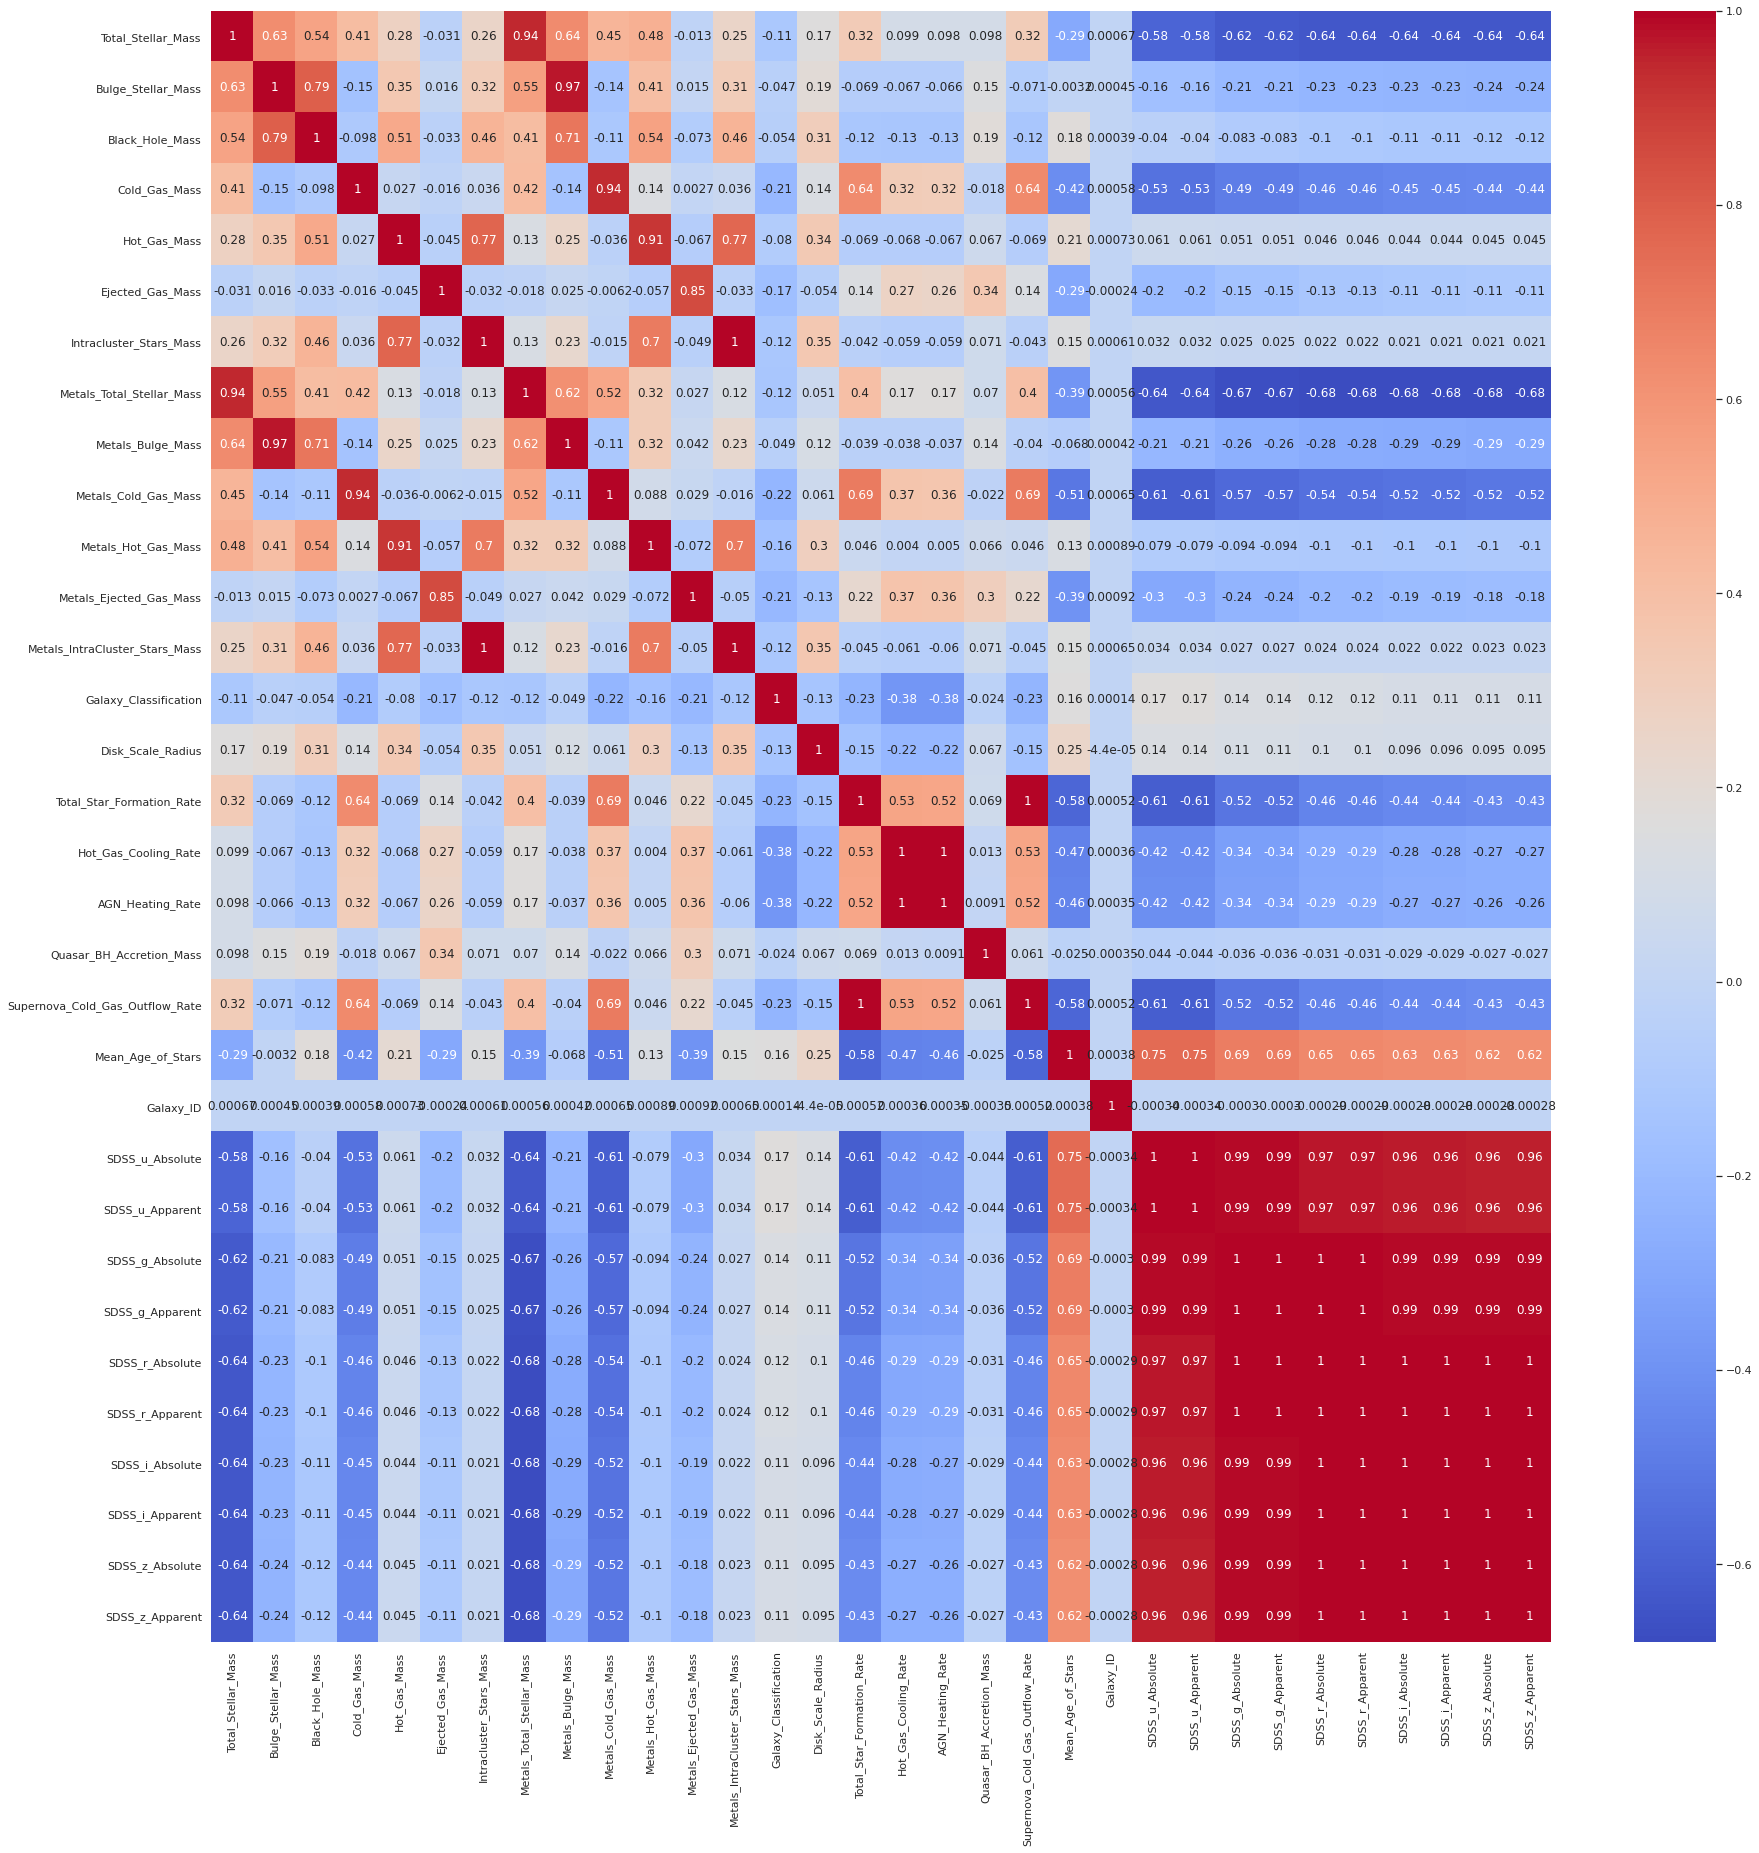

In [10]:
sns.heatmap(blackhole_data.corr(),cmap='coolwarm',annot=True)

In [11]:
blackhole_data.describe()

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
count        5.582544e+06        5.582544e+06     5.582544e+06   5.582544e+06   
mean         4.909592e+00        2.364215e+00     3.392910e-03   4.252831e-01   
std          3.653256e+00        2.560649e+00     3.822004e-03   6.232440e-01   
min          9.915940e-04        0.000000e+00     1.000000e-03   0.000000e+00   
25%          2.446618e+00        8.740967e-01     1.453670e-03   4.576240e-02   
50%          4.281780e+00        1.656365e+00     2.275330e-03   1.886720e-01   
75%          6.584540e+00        2.924780e+00     3.934980e-03   5.578940e-01   
max          1.079870e+02        8.896410e+01     2.709720e-01   5.786100e+01   

       Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  \
count  5.582544e+06      5.582544e+06             5.582544e+06   
mean   4.016275e+01      1.179279e-01             3.891224e+00   
std    1.597644e+02      4.178541e-01             2.089507e+01   
min    0.000000e+00      0.000000e+00             0.000000e+00   
25%    3.035188e+00      0.000000e+00             0.000000e+00   
50%    8.746390e+00      0.000000e+00             3.242845e-01   
75%    2.696360e+01      1.308470e-02             1.807650e+00   
max    2.367700e+04      4.437860e+01             4.005620e+03   

       Metals_Total_Stellar_Mass  Metals_Bulge_Mass  Metals_Cold_Gas_Mass  \
count               5.582544e+06       5.582544e+06          5.582544e+06   
mean                7.663113e-02       3.336552e-02          9.722163e-03   
std                 6.109218e-02       3.724335e-02          1.384802e-02   
min                 1.569460e-07       0.000000e+00          0.000000e+00   
25%                 3.077940e-02       9.696257e-03          1.765638e-04   
50%                 6.536980e-02       2.208060e-02          3.924700e-03   
75%                 1.071780e-01       4.326800e-02          1.395590e-02   
max                 1.089780e+00       9.919820e-01          4.084480e-01   

       ...  SDSS_u_Absolute  SDSS_u_Apparent  SDSS_g_Absolute  \
count  ...     5.582544e+06     5.582544e+06     5.582544e+06   
mean   ...    -1.891233e+01    -1.891233e+01    -2.043101e+01   
std    ...     1.742710e+00     1.742710e+00     1.601605e+00   
min    ...    -2.503940e+01    -2.503940e+01    -2.589920e+01   
25%    ...    -2.004420e+01    -2.004420e+01    -2.147250e+01   
50%    ...    -1.900510e+01    -1.900510e+01    -2.071080e+01   
75%    ...    -1.813060e+01    -1.813060e+01    -1.982080e+01   
max    ...     1.000000e+02     1.000000e+02     1.000000e+02   

       SDSS_g_Apparent  SDSS_r_Absolute  SDSS_r_Apparent  SDSS_i_Absolute  \
count     5.582544e+06     5.582544e+06     5.582544e+06     5.582544e+06   
mean     -2.043101e+01    -2.107098e+01    -2.107098e+01    -2.139576e+01   
std       1.601605e+00     1.549586e+00     1.549586e+00     1.541691e+00   
min      -2.589920e+01    -2.615390e+01    -2.615390e+01    -2.630480e+01   
25%      -2.147250e+01    -2.206030e+01    -2.206030e+01    -2.237090e+01   
50%      -2.071080e+01    -2.142530e+01    -2.142530e+01    -2.177540e+01   
75%      -1.982080e+01    -2.053760e+01    -2.053760e+01    -2.088890e+01   
max       1.000000e+02     1.000000e+02     1.000000e+02     1.000000e+02   

       SDSS_i_Apparent  SDSS_z_Absolute  SDSS_z_Apparent  
count     5.582544e+06     5.582544e+06     5.582544e+06  
mean     -2.139576e+01    -2.166196e+01    -2.166196e+01  
std       1.541691e+00     1.554221e+00     1.554221e+00  
min      -2.630480e+01    -2.643250e+01    -2.643250e+01  
25%      -2.237090e+01    -2.264170e+01    -2.264170e+01  
50%      -2.177540e+01    -2.206170e+01    -2.206170e+01  
75%      -2.088890e+01    -2.116500e+01    -2.116500e+01  
max       1.000000e+02     1.000000e+02     1.000000e+02  

[8 rows x 32 columns]

In [12]:
dataframe = blackhole_data.drop(columns=['Metals_Total_Stellar_Mass','Metals_Bulge_Mass','Metals_Cold_Gas_Mass','Metals_Hot_Gas_Mass','Metals_Ejected_Gas_Mass','Metals_IntraCluster_Stars_Mass','Galaxy_Classification','Galaxy_ID','SDSS_u_Absolute','SDSS_u_Apparent','SDSS_g_Absolute','SDSS_g_Apparent','SDSS_r_Absolute','SDSS_r_Apparent','SDSS_i_Absolute','SDSS_i_Apparent','SDSS_z_Absolute','SDSS_z_Apparent'])

In [13]:
dataframe.head()

Total_Stellar_Mass  Bulge_Stellar_Mass  Black_Hole_Mass  Cold_Gas_Mass  \
0            0.387174            0.385160         0.001336       0.048123   
1            0.846767            0.433929         0.001186       0.137686   
2            7.126350            1.604110         0.002302       1.188430   
3            3.070790            1.558470         0.002598       0.306917   
4           10.361900            6.639080         0.008644       0.008921   

   Hot_Gas_Mass  Ejected_Gas_Mass  Intracluster_Stars_Mass  Disk_Scale_Radius  \
0       5.19501          0.000000                  0.00000           0.001348   
1      66.12800          0.003088                  7.13868           0.006409   
2      26.53040          0.000085                  7.96940           0.009066   
3      18.74110          0.000000                  1.30453           0.003364   
4      15.85170          0.000000                  1.64459           0.002928   

   Total_Star_Formation_Rate  Hot_Gas_Cooling_Rate  AGN_Heating_Rate  \
0                   0.000000                0.0000            0.0000   
1                   0.000000                0.0000            0.0000   
2                   0.079265                0.0000            0.0000   
3                   0.000000               36.9508           36.9508   
4                   0.000000                0.0000            0.0000   

   Quasar_BH_Accretion_Mass  Supernova_Cold_Gas_Outflow_Rate  \
0                       0.0                         0.000000   
1                       0.0                         0.000000   
2                       0.0                         0.237794   
3                       0.0                         0.000000   
4                       0.0                         0.000000   

   Mean_Age_of_Stars  
0            7985.00  
1            8691.27  
2            6149.49  
3            7070.59  
4            4956.67

In [14]:
#Divide the features into Independent and Dependent Variable
X = dataframe.drop('Black_Hole_Mass' , axis =1)
y = dataframe['Black_Hole_Mass']

In [15]:
#Select top 2 features based on mutual info regression
#from sklearn.feature_selection import SelectKBest, mutual_info_regression
#selector = SelectKBest(mutual_info_regression, k =2)
#selector.fit(X, y)
#X.columns[selector.get_support()]

In [16]:
#bestfeatures = SelectKBest(score_func=mutual_info_regression, k=2)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [17]:
#Select top 2 features based on f_regression
from sklearn.feature_selection import SelectKBest, f_regression
#selector = SelectKBest(f_regression, k =10)
#selector.fit(X, y)
#X.columns[selector.get_support()]

In [18]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Specs         Score
1                Bulge_Stellar_Mass  9.318078e+06
0                Total_Stellar_Mass  2.301748e+06
3                      Hot_Gas_Mass  1.978618e+06
5           Intracluster_Stars_Mass  1.493750e+06
6                 Disk_Scale_Radius  5.858115e+05
10         Quasar_BH_Accretion_Mass  1.981292e+05
12                Mean_Age_of_Stars  1.835175e+05
8              Hot_Gas_Cooling_Rate  9.279990e+04
9                  AGN_Heating_Rate  9.029756e+04
11  Supernova_Cold_Gas_Outflow_Rate  8.464467e+04


[0.10872066 0.55210386 0.04306306 0.08616128 0.01168243 0.05361103
 0.04070133 0.00441215 0.00944215 0.01118659 0.00905656 0.0038281
 0.06603081]


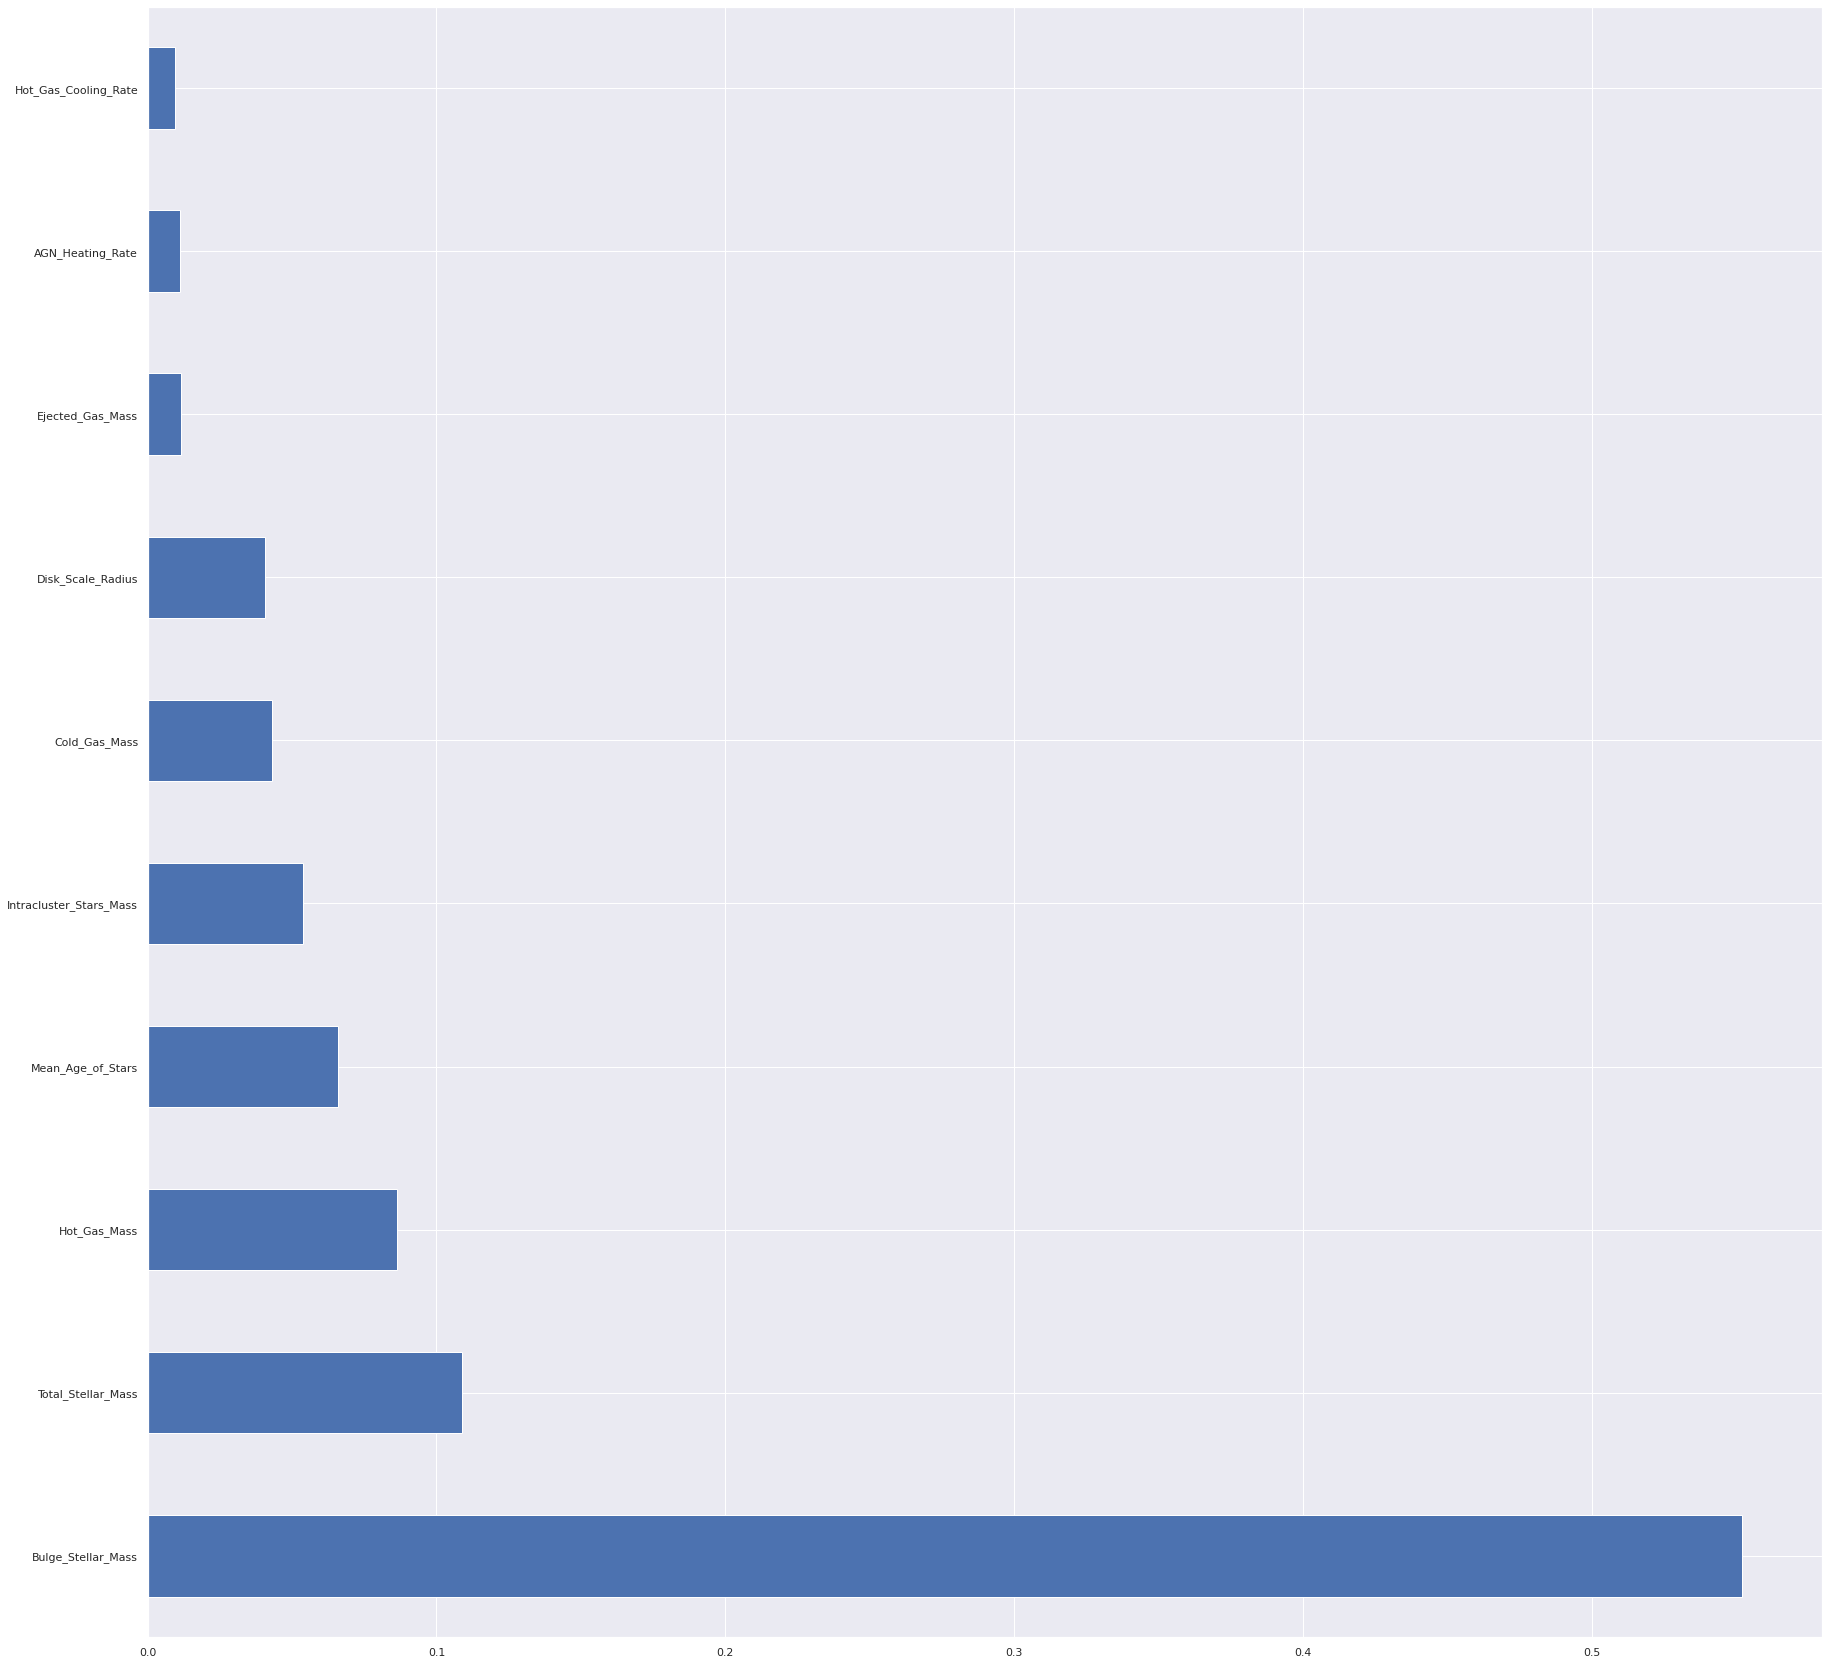

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()